In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Import the dataset from Github
url = 'https://raw.githubusercontent.com/padaungthar/ai-based-telecom/refs/heads/main/fwa_signal_dataset.csv'
df = pd.read_csv(url)

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (500, 6)


,distance_from_tower,line_of_sight,obstruction_type,elevation,device_height,signal_strength
0,405.813113,1,wall,5.553988,roof,-60.394886
1,953.178591,0,glass,16.257028,roof,-98.395428
2,745.394245,0,glass,26.188375,window,-93.147053
3,618.725560,0,wall,21.966747,window,-100.689218
4,198.217708,0,wall,24.196834,roof,-85.686024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   distance_from_tower  500 non-null    float64
 1   line_of_sight        500 non-null    int64  
 2   obstruction_type     500 non-null    object 
 3   elevation            500 non-null    float64
 4   device_height        500 non-null    object 
 5   signal_strength      500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


In [4]:
# Change the data type of 'line_of_sight' to "bool" type makes perfect sense and improves data clarity.
df['line_of_sight'] = df['line_of_sight'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   distance_from_tower  500 non-null    float64
 1   line_of_sight        500 non-null    bool   
 2   obstruction_type     500 non-null    object 
 3   elevation            500 non-null    float64
 4   device_height        500 non-null    object 
 5   signal_strength      500 non-null    float64
dtypes: bool(1), float64(3), object(2)
memory usage: 20.1+ KB


In [5]:
# 🧹 Step 3: Preprocess the Data
df_encoded = pd.get_dummies(df, columns=['obstruction_type', 'device_height'], drop_first=True)

X = df_encoded.drop("signal_strength", axis=1)
y = df_encoded["signal_strength"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 🔀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 🧠 Step 5: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# 📈 Step 6: Evaluate the Model
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 1.9786358057677733
R² Score: 0.9888699079488289


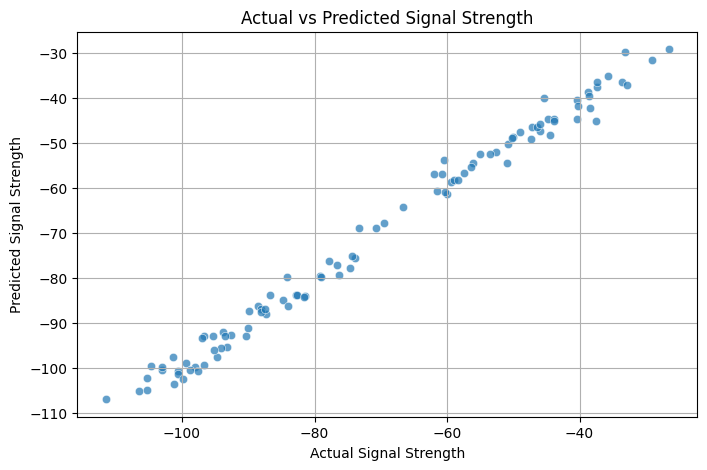

In [13]:
# 📊 Step 7: Visualize Prediction vs Actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Signal Strength")
plt.ylabel("Predicted Signal Strength")
plt.title("Actual vs Predicted Signal Strength")
plt.grid(True)
plt.show()

In [20]:
# 💡 Step 8: Try a Prediction Example
example = pd.DataFrame({
    'distance_from_tower': [200],
    'line_of_sight': [True],
    'elevation': [10],
    'obstruction_type_none': [1],
    'obstruction_type_tree': [0],
    'obstruction_type_wall': [0],
    'device_height_roof': [1],
    'device_height_window': [0],
})
example_scaled = scaler.transform(example)
prediction = model.predict(example_scaled)
print("📡 Predicted Signal Strength (dBm):", prediction[0])

📡 Predicted Signal Strength (dBm): -33.534948102204716


In [18]:
X.head(2)

,distance_from_tower,line_of_sight,elevation,obstruction_type_none,obstruction_type_tree,obstruction_type_wall,device_height_roof,device_height_window
0,405.813113,True,5.553988,False,False,True,True,False
1,953.178591,False,16.257028,False,False,False,True,False
